In [1]:
import pandas as pd

df = pd.read_csv('Data/creditcard.csv')
df.head()

# Separate the samples by class
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Drop the "Time" and "Class" columns
legit = legit.drop(['Time', 'Class'], axis=1)
fraud = fraud.drop(['Time', 'Class'], axis=1)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca),
                              index=legit_pca.index)

fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca),
                              index=fraud_pca.index)

In [3]:
import numpy as np

def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

legit_scores = get_anomaly_scores(legit, legit_restored)
fraud_scores = get_anomaly_scores(fraud, fraud_restored)

<Axes: >

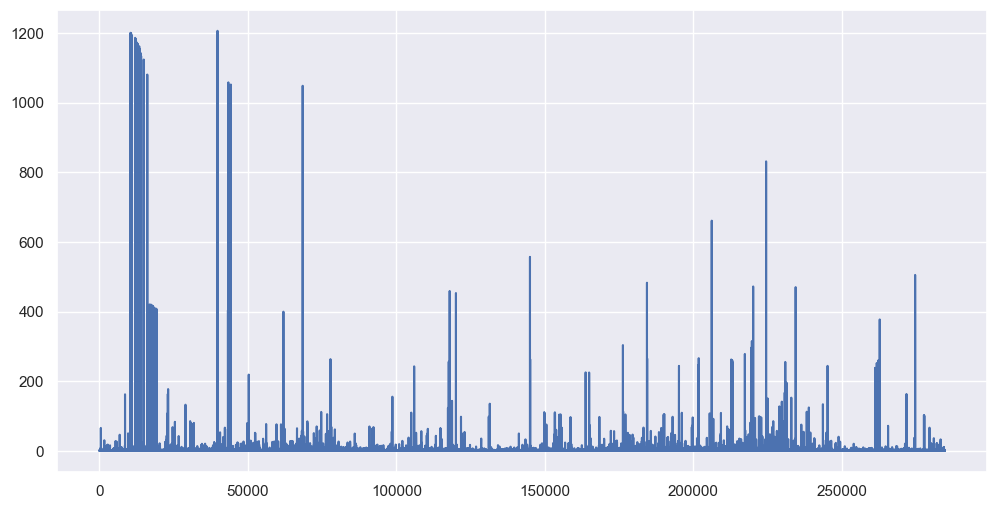

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

legit_scores.plot(figsize = (12, 6))

<Axes: >

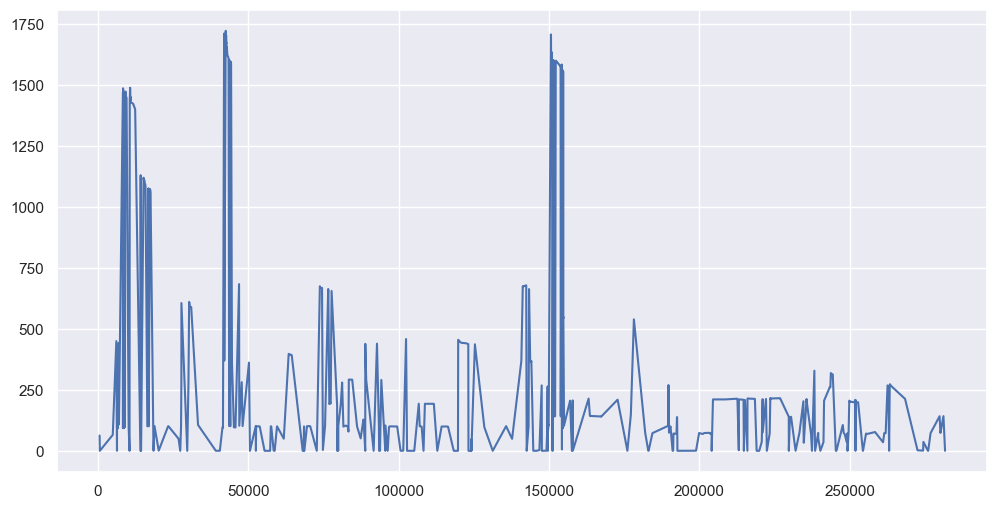

In [5]:
fraud_scores.plot(figsize = (12, 6))

Text(110.44999999999997, 0.5, 'True label')

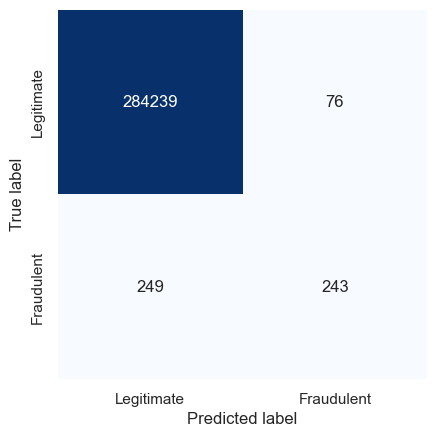

In [6]:
threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')